<a href="https://colab.research.google.com/github/31indianaSKKU/DeepLearning_2022FALL/blob/main/Week07_1_deeplearning_cross_validation_breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Model tuning with test set

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify =y, test_size=0.2, random_state=42)

In [ ]:
# Model tuning with test set(log loss)

from sklearn.linear_model import SGDClassifier   
sgd=SGDClassifier(loss='log',random_state=42)    #로지스틱 회귀
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [ ]:
# Model tuning with test set(hinge loss)

from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge',random_state=42)    #SVM
sgd.fit(x_train_all, y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [ ]:
#Model tuning with validation set

from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all, y_train_all, stratify= y_train_all, 
                                               test_size=0.2, random_state=42)    #위에서 split한 x_train_all과 y_train_all을 각각 x_train과 x_val(validation), y_train과 y_val(validation)으로 split!! 
print(len(x_train), len(x_val))

364 91


In [ ]:
#Model tuning with validation set

sgd = SGDClassifier(loss='log', random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)     #점수가 낮아진 이유는 위에서 train set의 수가 줄어들었기 때문.

0.6923076923076923

['mean perimeter' 'mean area']


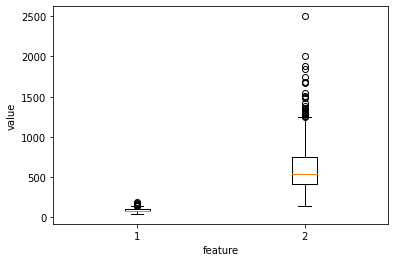

In [ ]:
#data scale 확인 : boxplot 활용.
##강의pdf에는 없고 영상에만 있음##
##강의pdf에는 없고 영상에만 있음##

import numpy as np
import matplotlib.pyplot as plt

print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
#Update by scaling
class SingleLayer:

  def__init__(self,learning_rate=0.1):
    self.w = None
    self.b = None
    self.losses=[]
    self.w_history=[]           #추가
    self.lr=learning_rate       #추가
  
  def forpass(self, x):
    z= np.sum(x * self.w) + self.b   #직선 방정식을 계산

##  Week 06_colab_practice 내용
##  Week 06_colab_practice 내용
"""
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

#fit() method
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])   #1로 초기화
    self.b = 0

    for i in range(epochs):    #위에서 epochs=100으로 설정했으므로 100번 돌리겠다는 의미
      for x_i, y_i in zip(x, y):   #모든 sample만큼 반복
        z = self.fwpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.bwpass(x_i, err)
        self.w -= w_grad         #가중치 update
        self.b -= b_grad         #절편 update
  
  def activation(self, z):
    a = 1 / (1+np.exp(-z))
    return a

#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     print(z)
     a = self.activation(np.array(z))
     return a > 0.5
"""

##  Week 06_colab_practice 내용
##  Week 06_colab_practice 내용






NameError: ignored

In [ ]:
##  Week 06_colab_practice 내용 + 내용 추가
##  Week 06_colab_practice 내용 + 내용 추가

class SingleLayerNN:
  #Loss Function
  def __init__(self, learning_rate = 0.1):  
    self.w = None 
    self.b= None 
    self.losses=[]
    self.w_history=[]                                   #추가#추가#추가#추가#추가
    self.lr=learning_rate                               #추가#추가#추가#추가#추가
 
 #Random permutation for training samples
  def fwpass(self, x):
    z = np.sum(x*self.w) + self.b     #직선 방정식 계산
    return z
  
  def bwpass(self, x, err):    #err은 어디서 나왔나?
    w_grad = x*err      #가중치에 대한 그래디언트를 계산
    b_grad = 1*err      #절편에 대한 그래디언트를 계산
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None)  #안전한 np.exp()계산을 위해       #추가#추가#추가#추가
    a = 1 / (1+np.exp(-z))      #시그모이드 계산
    return a

#fit() method
  def fit(self, x, y, epochs=100, x_val=None, y_val=None):        #추가#추가#추가#추가 
    self.w = np.ones(x.shape[1])           #가중치 초기화.
    self.b = 0                             #절편 초기화.
    self.w_history.append(self.w.copy())   #가중치 기록.           #추가#추가#추가#추가
    np.random.seed(42)                     #랜덤 시드 지정.
    for i in range(epochs):                #epochs만큼 반복.
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:                     #모든 샘플에 대해 반복.
        z = self.fwpass(x[i])               #정방향 계산
        a = self.activation(z)              #활성화 함수 적용
        err=-(y[i] - a)                     #오차 계산 
        w_grad,b_grad = self.bwpass(x[i],err)   #역방향 계산
        self.w -= self.lr * w_grad               #가중치 업데이트   #추가#추가#추가#추가
        self.b -= b_grad                          #절편 업데이트
        self.w_history.append(self.w.copy())                        #추가#추가#추가#추가
        #안전한로그계산을위해clipping한후loss를누적함
        a =np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
  
#predict() method
  def predict(self, x): 
     z = [self.fwpass(x_i) for x_i in x]
     #print(z)                                                  #제거#제거#제거#제거
     #a = self.activation(np.array(z))                          #제거#제거#제거#제거
     return np.array(z) >= 0                                    #수정#수정#수정#수정
     #a > 0.5                                                   #제거#제거#제거#제거

#score method
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

##  Week 06_colab_practice 내용 + 내용 추가
##  Week 06_colab_practice 내용 + 내용 추가

In [ ]:
layer1 = SingleLayerNN() 
layer1.fit(x_train, y_train) 
layer1.score(x_val,y_val)

0.9120879120879121

In [ ]:
#Update by scaling

#위의 전체코드에 반영함!!
#위의 전체코드에 반영함!!

def fit(self, x, y, epochs=100): 
  self.w = np.ones(x.shape[1]) 
  self.b=0
  self.w_history.append(self.w.copy()) 
  np.random.seed(0)
  for i in range(epochs): 
    loss=0
    indexes= np.random.permutation(np.arange(len(x)))
    ...
  self.losses.append(loss/len(y))

#위의 전체코드에 반영함!!
#위의 전체코드에 반영함!!

In [ ]:
#Update by scaling

#위의 전체코드에 반영함!!
#위의 전체코드에 반영함!!
for i in indexes:
  z = self.forpass(x[i])
  a = self.activation(z)
  err = -(y[i]-a)
  w_grad,b_grad = self.backprop(x[i],err)
  self.w -= self.lr*w_grad
  self.b -= b_grad
  self.w_history.append(self.w.copy())
  a = np.clip(a, 1e-10, 1-1e-10)
  loss += -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a))

#위의 전체코드에 반영함!!
#위의 전체코드에 반영함!!

In [ ]:
#Update by scaling

layer1 = SingleLayerNN() 
layer1.fit(x_train, y_train) 
layer1.score(x_val,y_val)

0.9120879120879121

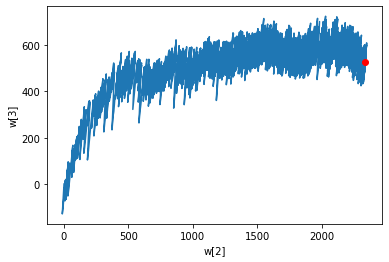

In [ ]:
##강의pdf에는 없고 영상에만 있음##
##강의pdf에는 없고 영상에만 있음##

w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
#Update by scaling
#표준화
train_mean = np.mean(x_train, axis=0) 
train_std = np.std(x_train,axis=0)
x_train_scaled = (x_train-train_mean) / train_std

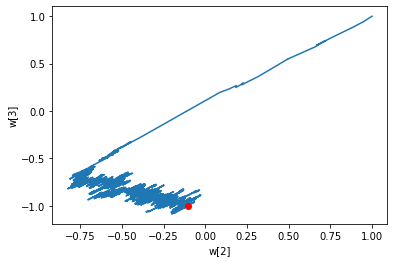

In [ ]:
#표준화 후 다시 진행

##강의pdf에는 없고 영상에만 있음##
##강의pdf에는 없고 영상에만 있음##

layer2 = SingleLayerNN()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [ ]:
#Update by scaling

layer2.score(x_val,y_val)   #점수가 확 떨어진 이유는 validation set의 스케일을 변환하지 않았기 때문.

0.37362637362637363

In [ ]:
#Update by scaling

val_mean = np.mean(x_val,axis=0)
val_std = np.std(x_val,axis=0)
x_val_scaled = (x_val-val_mean) / val_std    #위에서 언급한 validataion set의 스케일 진행
layer2.score(x_val_scaled, y_val)

0.967032967032967

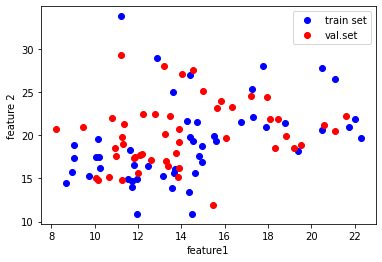

In [ ]:
#Notice in scaling

plt.plot(x_train[:50,0], x_train[:50,1], 'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val.set'])
plt.show()



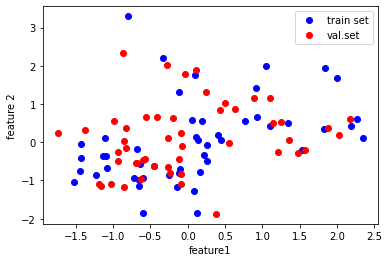

In [ ]:
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature 2') 
plt.legend(['train set', 'val.set'])
plt.show()                            #위와 모양과 거리가 조금씩 다르다.  -->  다르면 안됨.

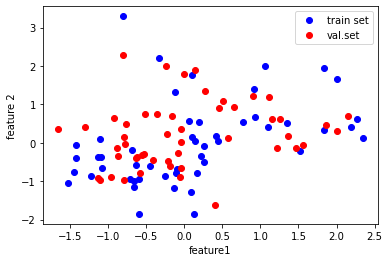

In [ ]:
#Notice in scaling

x_val_scaled = (x_val - train_mean) / train_std        #이를 통해 위의 거리와 모양이 달랐던 문제 해결! 
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature1')
plt.ylabel('feature 2') 
plt.legend(['train set', 'val.set']) 
plt.show()

In [ ]:
#Notice in scaling

layer2.score(x_val_scaled, y_val)

0.967032967032967